In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn


from scipy import stats
from scipy.stats import norm, skew


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
train = pd.read_csv('all-2/train.csv')
test = pd.read_csv('all-2/test.csv')

In [3]:
train['timestamp'] = pd.to_datetime(train['timestamp'])
test['timestamp'] = pd.to_datetime(test['timestamp'])
# macro['timestamp'] = pd.to_datetime(macro['timestamp']) 

train['year_month'] = train['timestamp'].dt.to_period('M')
test['year_month'] = test['timestamp'].dt.to_period('M')

In [4]:
train.head(5)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [5]:
test.head(5)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [6]:
train_ID = train['id']
test_ID = test['id']

train.drop("id", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)

# Data Processing

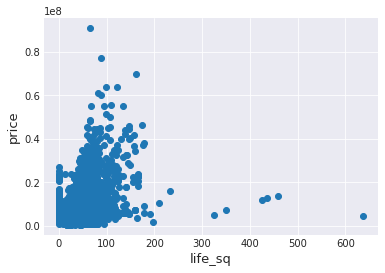

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = train['life_sq'], y = train['price'])
plt.ylabel('price', fontsize=13)
plt.xlabel('life_sq', fontsize=13)
plt.show()

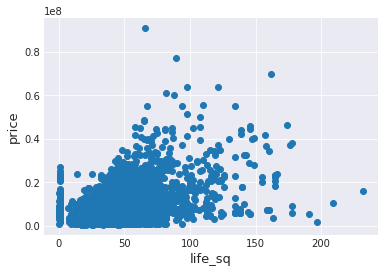

In [8]:
# Remove outlier for life sq
train = train.drop(train[(train['life_sq']>300) & (train['price']<2e8)].index)

fig, ax = plt.subplots()
ax.scatter(x = train['life_sq'], y = train['price'])
plt.ylabel('price', fontsize=13)
plt.xlabel('life_sq', fontsize=13)
plt.show()

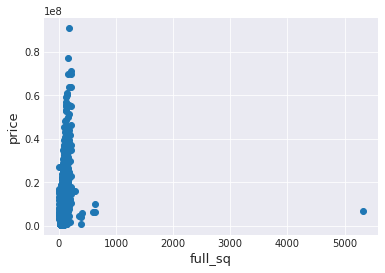

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = train['full_sq'], y = train['price'])
plt.ylabel('price', fontsize=13)
plt.xlabel('full_sq', fontsize=13)
plt.show()

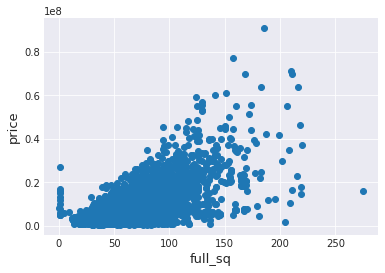

In [10]:
# Remove outlier for full sq
train = train.drop(train[(train['full_sq']>300) & (train['price']<2e8)].index)

fig, ax = plt.subplots()
ax.scatter(x = train['full_sq'], y = train['price'])
plt.ylabel('price', fontsize=13)
plt.xlabel('full_sq', fontsize=13)
plt.show()

## Features engineering

In [11]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.price.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['price'], axis=1, inplace=True)

### Missing Data

In [12]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
hospital_beds_raion,47.401
build_year,44.637
state,44.486
cafe_avg_price_500,43.579
cafe_sum_500_max_price_avg,43.579
cafe_sum_500_min_price_avg,43.579
kitch_sq,31.402
num_room,31.402
max_floor,31.402
material,31.402


Text(0.5,1,'Percent missing data by feature')

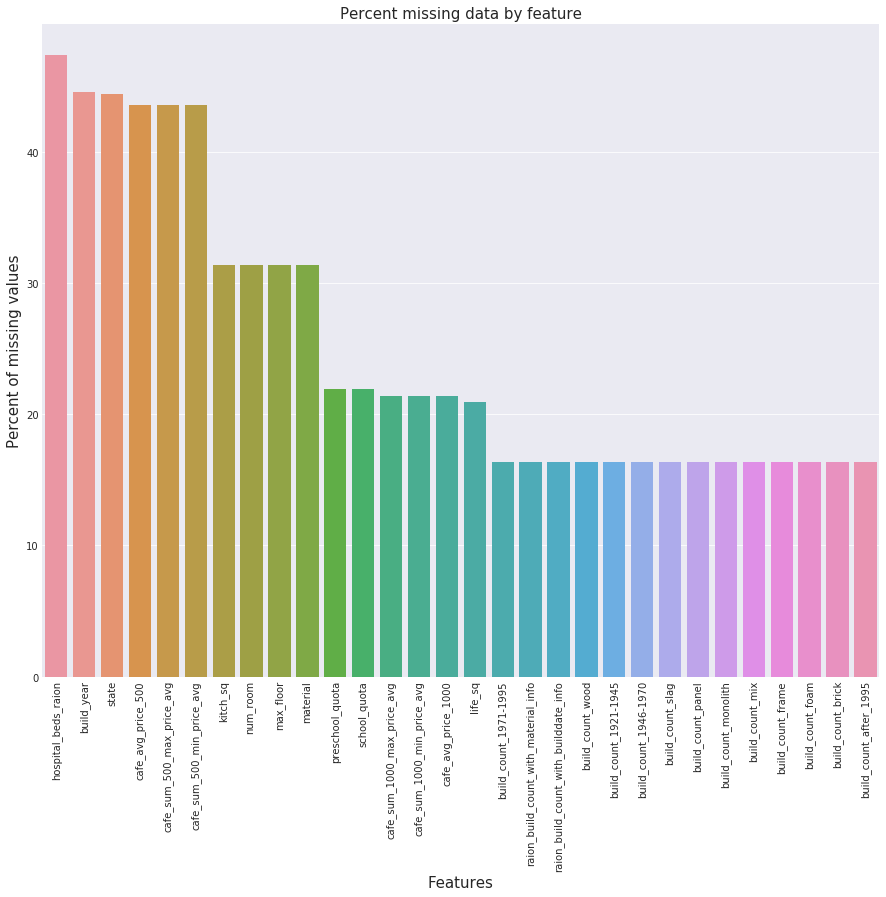

In [13]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [14]:
all_data["year_month"] = all_data["year_month"].fillna("None")

In [15]:
all_data['year'] = all_data.timestamp.dt.year
all_data['month'] = all_data.timestamp.dt.month
all_data.drop(columns=['timestamp'], inplace=True)

In [16]:
all_data.build_year.value_counts()

2014.000        919
2015.000        824
0.000           530
2013.000        464
1970.000        418
1969.000        407
1968.000        389
1967.000        384
1965.000        378
2016.000        374
1.000           368
1972.000        360
1974.000        357
1971.000        352
1966.000        348
1960.000        344
1962.000        338
1973.000        333
1963.000        325
1964.000        315
1975.000        309
1961.000        297
1976.000        263
1977.000        260
2006.000        242
1978.000        235
1979.000        235
2008.000        234
2012.000        233
1980.000        226
2004.000        220
2007.000        219
2002.000        214
1959.000        208
2003.000        193
1981.000        189
1982.000        189
1983.000        185
1958.000        179
1985.000        178
2001.000        177
2005.000        176
2009.000        176
1987.000        171
1984.000        169
2011.000        162
1996.000        161
1994.000        160
1988.000        155
1989.000        155


In [17]:
all_data.loc[all_data.build_year > 2018, 'build_year'] = np.NaN
all_data.loc[all_data.build_year < 1800, 'build_year'] = np.NaN

In [18]:
all_data.build_year.value_counts()

2014.000    919
2015.000    824
2013.000    464
1970.000    418
1969.000    407
1968.000    389
1967.000    384
1965.000    378
2016.000    374
1972.000    360
1974.000    357
1971.000    352
1966.000    348
1960.000    344
1962.000    338
1973.000    333
1963.000    325
1964.000    315
1975.000    309
1961.000    297
1976.000    263
1977.000    260
2006.000    242
1979.000    235
1978.000    235
2008.000    234
2012.000    233
1980.000    226
2004.000    220
2007.000    219
2002.000    214
1959.000    208
2003.000    193
1981.000    189
1982.000    189
1983.000    185
1958.000    179
1985.000    178
2001.000    177
2005.000    176
2009.000    176
1987.000    171
1984.000    169
2011.000    162
1996.000    161
1994.000    160
1989.000    155
1988.000    155
2017.000    154
1995.000    149
1998.000    141
1992.000    139
1997.000    139
2010.000    132
1986.000    131
2000.000    130
1990.000    129
1999.000    124
1957.000    119
1993.000    115
1991.000     93
1955.000     52
1956.000

In [19]:
columns_list = ['max_floor', 'material', 'build_year']
for column in all_data.columns:
    if 'avg' in column or 'count' in column \
    or 'quota' in column:
        all_data[column] = all_data.groupby(["ID_bus_terminal"])[column].apply(
            lambda x: x.fillna(np.nanmean(x)))
        all_data[column] = all_data.groupby(["ID_metro"])[column].apply(
            lambda x: x.fillna(np.nanmean(x)))
        all_data[column] = all_data.groupby(["sub_area"])[column].apply(
            lambda x: x.fillna(np.nanmean(x)))
        all_data[column] = all_data.groupby(["ID_railroad_station_walk"])[column].apply(
            lambda x: x.fillna(np.nanmean(x)))
        all_data[column] = all_data.groupby(["ID_big_road1"])[column].apply(
            lambda x: x.fillna(np.nanmean(x)))
        all_data[column] = all_data.groupby(["ID_railroad_terminal"])[column].apply(
            lambda x: x.fillna(np.nanmean(x)))
        
for column in all_data.columns:
    if column in columns_list:
        all_data[column] = all_data.groupby(["ID_bus_terminal"])[column].apply(
            lambda x: x.fillna(np.nanmedian(x)))
        all_data[column] = all_data.groupby(["ID_metro"])[column].apply(
            lambda x: x.fillna(np.nanmedian(x)))
        all_data[column] = all_data.groupby(["sub_area"])[column].apply(
            lambda x: x.fillna(np.nanmedian(x)))
        all_data[column] = all_data.groupby(["ID_railroad_station_walk"])[column].apply(
            lambda x: x.fillna(np.nanmedian(x)))
        all_data[column] = all_data.groupby(["ID_big_road1"])[column].apply(
            lambda x: x.fillna(np.nanmedian(x)))
        all_data[column] = all_data.groupby(["ID_railroad_terminal"])[column].apply(
            lambda x: x.fillna(np.nanmedian(x)))

In [20]:
all_data["state"] = all_data.groupby(["build_year"])["state"].transform(
    lambda x: x.fillna(np.nanmedian(x)))

In [21]:
columns_based_on_area = ['hospital_beds_raion', 'build_year']

all_data["hospital_beds_raion"] = all_data.groupby(["sub_area"])["hospital_beds_raion"].transform(
    lambda x: x.fillna(np.nanmean(x)))
all_data["hospital_beds_raion"] = all_data.groupby(["ID_bus_terminal"])["hospital_beds_raion"].apply(
    lambda x: x.fillna(np.nanmean(x)))
all_data["hospital_beds_raion"] = all_data.groupby(["ID_metro"])["hospital_beds_raion"].transform(
    lambda x: x.fillna(np.nanmean(x)))
all_data["hospital_beds_raion"] = all_data.groupby(["ID_railroad_station_walk"])["hospital_beds_raion"].apply(
    lambda x: x.fillna(np.nanmean(x)))
all_data["hospital_beds_raion"] = all_data.groupby(["ID_big_road1"])["hospital_beds_raion"].apply(
    lambda x: x.fillna(np.nanmean(x)))
all_data["hospital_beds_raion"] = all_data.groupby(["ID_railroad_terminal"])["hospital_beds_raion"].apply(
    lambda x: x.fillna(np.nanmean(x)))

In [22]:
all_data["num_room"] = all_data.groupby(pd.cut(all_data["life_sq"], [0, 20, 40, 60, 80, 100, 130, 1000]))["num_room"].apply(
    lambda x: x.fillna(np.nanmedian(x)))

In [23]:
all_data["num_room"] = all_data.groupby(pd.cut(all_data["full_sq"], [0, 20, 40, 60, 80, 100, 130, 1000]))["num_room"].apply(
    lambda x: x.fillna(np.nanmedian(x)))

In [24]:
all_data["life_sq"] = all_data.groupby(pd.cut(all_data["full_sq"], [0, 10, 20, 30, 40, 50, 60, 70, 80, 100,120, 140, 160, 200, 300, 1000]))["num_room"].apply(
    lambda x: x.fillna(np.nanmedian(x)))

In [25]:
all_data["kitch_sq"] = all_data.groupby(pd.cut(all_data["life_sq"], [0, 20, 40, 60, 80, 100, 130, 1000]))["kitch_sq"].apply(
    lambda x: x.fillna(np.nanmedian(x)))

In [26]:
# Check remaining missing values
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
prom_part_5000,0.584
floor,0.548
railroad_station_walk_min,0.082
railroad_station_walk_km,0.082
metro_min_walk,0.082


In [27]:
# Transforming some numerical variables
cat_features = ['material', 'state', 'ID_metro', 'ID_railroad_station_walk', 'ID_railroad_station_avto',
'ID_big_road1', 'big_road1_1line', 'ID_big_road2', 'ID_railroad_terminal', 'ID_bus_terminal']
for feature in cat_features:
    all_data[feature] = all_data[feature].astype(str)



In [28]:
from sklearn.preprocessing import LabelEncoder
cols = ['product_type', 'sub_area', 'material', 'state', 'ID_metro', 'ID_railroad_station_walk', 'ID_railroad_station_avto',
'ID_big_road1', 'big_road1_1line', 'ID_big_road2', 'ID_railroad_terminal', 'ID_bus_terminal']


for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))
      
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (30457, 292)


**Skewed features**

In [29]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


,Skew
kitch_sq,80.843
mosque_count_500,14.192
leisure_count_500,10.203
build_count_foam,9.877
public_transport_station_min_walk,9.472
public_transport_station_km,9.472
cafe_count_1000_price_high,8.481
kindergarten_km,7.936
preschool_km,7.464
school_km,7.450


**Box Cox Transformation of skewed features**

In [30]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)
    

There are 279 skewed numerical features to Box Cox transform


In [31]:
all_data.fillna(0, inplace=True)
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(30457, 353)


In [32]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# Models

In [33]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import lightgbm as lgb



In [34]:
# Validation function
n_folds = 5
from sklearn.metrics.scorer import make_scorer

def metric(y_pred, y):
    return mean_absolute_error(y_pred, y)

my_scorer = make_scorer(metric, greater_is_better=False)

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True).get_n_splits(train.values)
    rmse= -cross_val_score(model, train.values, y_train, scoring=my_scorer, cv = kf)
    return(rmse)

### Lasso

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors=15, weights='distance', leaf_size=10, n_jobs=-1)

In [52]:
score = rmsle_cv(knn)
print("KNN score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

KNN score: 2864443.4758 (129349.4387)



### Lasso

In [118]:
lasso =  Lasso(alpha=0.005, max_iter=2000)

In [56]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 1798894.4275 (39703.9536)



### Elastic Net Regression


In [88]:
ENet = ElasticNet(alpha=0.005, l1_ratio=.5)

In [174]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 1788393.4870 (33359.2710)



### Kernel Ridge Regression

In [352]:
KRR = KernelRidge(alpha=0.4, kernel='polynomial', degree=2, coef0=2)

In [176]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 1666153.5875 (46294.1258)



In [35]:
from keras.models import Model
from keras.layers import Input, Dense, Concatenate, BatchNormalization,\
    Dropout, Conv1D, Embedding, Reshape, Flatten, LSTM, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.utils import np_utils
import keras
import keras.backend as K

activation = 'relu'
def create_model():
    # keras.backend.clear_session()
    
    input_all = Input(shape=(353, ))
    
    drop = Dropout(0.05)(input_all)
    dense = Dense(32, activation=activation)(drop)
    dense = Dense(64, activation=activation)(dense)
    dense = Dense(32, activation=activation)(dense)
    dense = Dense(64, activation=activation)(dense)
    dense = Dense(64, activation=activation)(dense)
    dense = Dense(32, activation=activation)(dense)
    dense = Dense(64, activation=activation)(dense)
    dense = Dense(64, activation=activation)(dense)
    dense = Dense(64, activation=activation)(dense)
    dense = Concatenate()([input_all, dense])
    dense = Dense(1)(dense)
    model = Model(inputs=input_all, outputs=dense)
    model.compile(loss='mean_absolute_error', optimizer=Adam())
    return model

create_model().summary()
class NNClassifier(BaseEstimator):
    def fit(self, X, y=None):
        self.model = create_model()
        save_model_name = f'nn_2'
        batch_size = 512
        
        model_checkpoint = ModelCheckpoint(save_model_name, monitor='val_loss',
                                           save_best_only=True)
        self.model.fit(X, y, verbose=1, epochs=600,
                 validation_split=0.1,  callbacks=[model_checkpoint],
                       batch_size=batch_size)
        self.model.load_weights(filepath=save_model_name)
        
    def predict(self, X, y=None):
#         dtest = lgb.Dataset(X)
#         dtest.save_binary('test.lgb')
        return self.model.predict(X)


Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 353)          0                                            
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 353)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 32)           11328       dropout_1[0][0]                  
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           2112        dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (D

In [36]:
score = rmsle_cv(NNClassifier())
print("NN score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Train on 14389 samples, validate on 1599 samples
Epoch 1/600
14389/14389 [==============================] - 1s 65us/step - loss: 7116062.4968 - val_loss: 7250173.0575
Epoch 2/600
14389/14389 [==============================] - 0s 7us/step - loss: 7044895.2057 - val_loss: 6770613.3058
Epoch 3/600
14389/14389 [==============================] - 0s 7us/step - loss: 4124807.7659 - val_loss: 2896383.0563
Epoch 4/600
14389/14389 [==============================] - 0s 7us/step - loss: 2669623.4741 - val_loss: 2700459.7722
Epoch 5/600
14389/14389 [==============================] - 0s 7us/step - loss: 2624580.9385 - val_loss: 2703428.2217
Epoch 6/600
14389/14389 [==============================] - 0s 7us/step - loss: 2617625.9883 - val_loss: 2697436.9021
Epoch 7/600
14389/14389 [==============================] - 0s 7us/step - loss: 2616463.9413 - val_loss: 2698637.5120
Epoch 8/600
14389/14389 [==============================] - 0s 9us/step - loss: 2618258.7985 - val_loss: 2697192.7992
Epoch 9/600
14

14389/14389 [==============================] - 0s 7us/step - loss: 1921569.5469 - val_loss: 1878277.5412
Epoch 71/600
14389/14389 [==============================] - 0s 7us/step - loss: 1922289.3798 - val_loss: 2007520.0092
Epoch 72/600
14389/14389 [==============================] - 0s 6us/step - loss: 1942261.4514 - val_loss: 1847171.2466
Epoch 73/600
14389/14389 [==============================] - 0s 6us/step - loss: 1919228.4821 - val_loss: 1860033.4810
Epoch 74/600
14389/14389 [==============================] - 0s 7us/step - loss: 1929779.7663 - val_loss: 1898742.0755
Epoch 75/600
14389/14389 [==============================] - 0s 7us/step - loss: 1897528.1074 - val_loss: 2011799.7240
Epoch 76/600
14389/14389 [==============================] - 0s 7us/step - loss: 1913777.9659 - val_loss: 1936640.4271
Epoch 77/600
14389/14389 [==============================] - 0s 7us/step - loss: 1887212.4328 - val_loss: 1815678.6114
Epoch 78/600
14389/14389 [==============================] - 0s 7us/st

Epoch 208/600
14389/14389 [==============================] - 0s 6us/step - loss: 1599728.7050 - val_loss: 1696492.4282
Epoch 209/600
14389/14389 [==============================] - 0s 7us/step - loss: 1580383.3534 - val_loss: 1866255.4096
Epoch 210/600
14389/14389 [==============================] - 0s 6us/step - loss: 1586796.9814 - val_loss: 1941362.3791
Epoch 211/600
14389/14389 [==============================] - 0s 7us/step - loss: 1617853.5247 - val_loss: 1699271.0231
Epoch 212/600
14389/14389 [==============================] - 0s 6us/step - loss: 1582432.6343 - val_loss: 1808650.3467
Epoch 213/600
14389/14389 [==============================] - 0s 7us/step - loss: 1589074.7609 - val_loss: 2018948.3118
Epoch 214/600
14389/14389 [==============================] - 0s 6us/step - loss: 1598076.3440 - val_loss: 1575449.6025
Epoch 215/600
14389/14389 [==============================] - 0s 8us/step - loss: 1614706.0739 - val_loss: 1596029.5326
Epoch 216/600
14389/14389 [=====================

Epoch 277/600
14389/14389 [==============================] - 0s 7us/step - loss: 1509718.5713 - val_loss: 1643903.1211
Epoch 278/600
14389/14389 [==============================] - 0s 6us/step - loss: 1476142.0859 - val_loss: 1720492.4002
Epoch 279/600
14389/14389 [==============================] - 0s 6us/step - loss: 1472072.9864 - val_loss: 1817747.6715
Epoch 280/600
14389/14389 [==============================] - 0s 6us/step - loss: 1475059.4727 - val_loss: 2054445.7647
Epoch 281/600
14389/14389 [==============================] - 0s 6us/step - loss: 1489536.3401 - val_loss: 1728862.9808
Epoch 282/600
14389/14389 [==============================] - 0s 6us/step - loss: 1455464.0150 - val_loss: 1661622.8164
Epoch 283/600
14389/14389 [==============================] - 0s 7us/step - loss: 1452576.5058 - val_loss: 1838697.5188
Epoch 284/600
14389/14389 [==============================] - 0s 6us/step - loss: 1483563.4709 - val_loss: 1893678.4154
Epoch 285/600
14389/14389 [=====================

Epoch 346/600
14389/14389 [==============================] - 0s 6us/step - loss: 1463901.8134 - val_loss: 1959976.8673
Epoch 347/600
14389/14389 [==============================] - 0s 7us/step - loss: 1454471.2606 - val_loss: 1780590.1061
Epoch 348/600
14389/14389 [==============================] - 0s 6us/step - loss: 1465854.0236 - val_loss: 1937137.4432
Epoch 349/600
14389/14389 [==============================] - 0s 7us/step - loss: 1437183.6887 - val_loss: 1924703.6007
Epoch 350/600
14389/14389 [==============================] - 0s 7us/step - loss: 1438960.1514 - val_loss: 1931528.9846
Epoch 351/600
14389/14389 [==============================] - 0s 6us/step - loss: 1457313.7447 - val_loss: 2055308.6844
Epoch 352/600
14389/14389 [==============================] - 0s 6us/step - loss: 1432241.8853 - val_loss: 1719744.1504
Epoch 353/600
14389/14389 [==============================] - 0s 7us/step - loss: 1416610.0107 - val_loss: 1720975.6094
Epoch 354/600
14389/14389 [=====================

Epoch 415/600
14389/14389 [==============================] - 0s 6us/step - loss: 1427287.9954 - val_loss: 1642405.6234
Epoch 416/600
14389/14389 [==============================] - 0s 7us/step - loss: 1404497.0465 - val_loss: 1567875.1918
Epoch 417/600
14389/14389 [==============================] - 0s 7us/step - loss: 1418493.3180 - val_loss: 1780913.2997
Epoch 418/600
14389/14389 [==============================] - 0s 7us/step - loss: 1429297.4350 - val_loss: 1541404.9384
Epoch 419/600
14389/14389 [==============================] - 0s 6us/step - loss: 1464398.1633 - val_loss: 1550553.3848
Epoch 420/600
14389/14389 [==============================] - 0s 6us/step - loss: 1441562.9706 - val_loss: 1722886.3561
Epoch 421/600
14389/14389 [==============================] - 0s 6us/step - loss: 1414471.2689 - val_loss: 1590174.7881
Epoch 422/600
14389/14389 [==============================] - 0s 6us/step - loss: 1407181.4404 - val_loss: 1992314.4962
Epoch 423/600
14389/14389 [=====================

Epoch 484/600
14389/14389 [==============================] - 0s 7us/step - loss: 1389366.8069 - val_loss: 1604453.9317
Epoch 485/600
14389/14389 [==============================] - 0s 6us/step - loss: 1390440.8444 - val_loss: 1798665.2476
Epoch 486/600
14389/14389 [==============================] - 0s 7us/step - loss: 1396000.7739 - val_loss: 2085156.2760
Epoch 487/600
14389/14389 [==============================] - 0s 6us/step - loss: 1419075.0823 - val_loss: 1674028.5027
Epoch 488/600
14389/14389 [==============================] - 0s 7us/step - loss: 1404843.3959 - val_loss: 1858080.5692
Epoch 489/600
14389/14389 [==============================] - 0s 8us/step - loss: 1396988.1204 - val_loss: 1676117.1515
Epoch 490/600
14389/14389 [==============================] - 0s 7us/step - loss: 1386716.0624 - val_loss: 1661989.6542
Epoch 491/600
14389/14389 [==============================] - 0s 7us/step - loss: 1392800.9250 - val_loss: 1711663.7530
Epoch 492/600
14389/14389 [=====================

Epoch 553/600
14389/14389 [==============================] - 0s 7us/step - loss: 1373374.4879 - val_loss: 1651370.3905
Epoch 554/600
14389/14389 [==============================] - 0s 7us/step - loss: 1392242.9262 - val_loss: 1793076.9898
Epoch 555/600
14389/14389 [==============================] - 0s 6us/step - loss: 1410887.5801 - val_loss: 1604538.7000
Epoch 556/600
14389/14389 [==============================] - 0s 6us/step - loss: 1382959.3590 - val_loss: 1462780.8691
Epoch 557/600
14389/14389 [==============================] - 0s 6us/step - loss: 1394226.4119 - val_loss: 1758978.1453
Epoch 558/600
14389/14389 [==============================] - 0s 7us/step - loss: 1378901.5007 - val_loss: 1558197.9817
Epoch 559/600
14389/14389 [==============================] - 0s 7us/step - loss: 1406679.8008 - val_loss: 1653044.1918
Epoch 560/600
14389/14389 [==============================] - 0s 6us/step - loss: 1381536.5553 - val_loss: 1886074.2765
Epoch 561/600
14389/14389 [=====================

14390/14390 [==============================] - 0s 7us/step - loss: 1832274.2098 - val_loss: 1815938.8307
Epoch 91/600
14390/14390 [==============================] - 0s 8us/step - loss: 1828750.3995 - val_loss: 1956171.0002
Epoch 92/600
14390/14390 [==============================] - 0s 8us/step - loss: 1813103.5398 - val_loss: 1761355.4003
Epoch 93/600
14390/14390 [==============================] - 0s 8us/step - loss: 1796407.2962 - val_loss: 1871801.4241
Epoch 94/600
14390/14390 [==============================] - 0s 6us/step - loss: 1793857.7157 - val_loss: 1840499.7610
Epoch 95/600
14390/14390 [==============================] - 0s 6us/step - loss: 1799189.7762 - val_loss: 1940785.3837
Epoch 96/600
14390/14390 [==============================] - 0s 6us/step - loss: 1783305.4322 - val_loss: 1883655.8273
Epoch 97/600
14390/14390 [==============================] - 0s 7us/step - loss: 1789682.5217 - val_loss: 1842600.9832
Epoch 98/600
14390/14390 [==============================] - 0s 6us/st

14390/14390 [==============================] - 0s 6us/step - loss: 1647541.9575 - val_loss: 1891157.5641
Epoch 160/600
14390/14390 [==============================] - 0s 6us/step - loss: 1647342.0210 - val_loss: 1938939.1685
Epoch 161/600
14390/14390 [==============================] - 0s 7us/step - loss: 1664672.8515 - val_loss: 1744989.6185
Epoch 162/600
14390/14390 [==============================] - 0s 7us/step - loss: 1647465.2493 - val_loss: 1691354.2279
Epoch 163/600
14390/14390 [==============================] - 0s 7us/step - loss: 1635654.3222 - val_loss: 1630350.8195
Epoch 164/600
14390/14390 [==============================] - 0s 7us/step - loss: 1650411.1005 - val_loss: 1743120.2487
Epoch 165/600
14390/14390 [==============================] - 0s 7us/step - loss: 1636427.4721 - val_loss: 1736324.6116
Epoch 166/600
14390/14390 [==============================] - 0s 6us/step - loss: 1619516.4720 - val_loss: 1777421.9938
Epoch 167/600
14390/14390 [==============================] - 0

Epoch 228/600
14390/14390 [==============================] - 0s 7us/step - loss: 1529117.2970 - val_loss: 1735631.7367
Epoch 229/600
14390/14390 [==============================] - 0s 7us/step - loss: 1530254.4544 - val_loss: 1818379.4714
Epoch 230/600
14390/14390 [==============================] - 0s 6us/step - loss: 1517353.3540 - val_loss: 1839764.4331
Epoch 231/600
14390/14390 [==============================] - 0s 6us/step - loss: 1505997.1369 - val_loss: 1798433.9103
Epoch 232/600
14390/14390 [==============================] - 0s 7us/step - loss: 1522432.8888 - val_loss: 1886074.4930
Epoch 233/600
14390/14390 [==============================] - 0s 6us/step - loss: 1510914.7331 - val_loss: 1578565.2690
Epoch 234/600
14390/14390 [==============================] - 0s 6us/step - loss: 1527042.6485 - val_loss: 1725982.2411
Epoch 235/600
14390/14390 [==============================] - 0s 6us/step - loss: 1518797.7675 - val_loss: 1677875.3515
Epoch 236/600
14390/14390 [=====================

Epoch 297/600
14390/14390 [==============================] - 0s 7us/step - loss: 1457123.0555 - val_loss: 1935103.9722
Epoch 298/600
14390/14390 [==============================] - 0s 7us/step - loss: 1460839.7554 - val_loss: 1868558.4712
Epoch 299/600
14390/14390 [==============================] - 0s 7us/step - loss: 1451280.2634 - val_loss: 1652112.1267
Epoch 300/600
14390/14390 [==============================] - 0s 7us/step - loss: 1436997.5937 - val_loss: 1553266.9697
Epoch 301/600
14390/14390 [==============================] - 0s 7us/step - loss: 1448879.8955 - val_loss: 1999046.9153
Epoch 302/600
14390/14390 [==============================] - 0s 7us/step - loss: 1450696.1152 - val_loss: 1588525.4677
Epoch 303/600
14390/14390 [==============================] - 0s 7us/step - loss: 1461338.6145 - val_loss: 1913104.7731
Epoch 304/600
14390/14390 [==============================] - 0s 7us/step - loss: 1449024.5737 - val_loss: 1980890.2059
Epoch 305/600
14390/14390 [=====================

Epoch 366/600
14390/14390 [==============================] - 0s 7us/step - loss: 1387888.6188 - val_loss: 1653998.2271
Epoch 367/600
14390/14390 [==============================] - 0s 7us/step - loss: 1413338.7075 - val_loss: 1989973.3942
Epoch 368/600
14390/14390 [==============================] - 0s 7us/step - loss: 1429769.8367 - val_loss: 1859297.5432
Epoch 369/600
14390/14390 [==============================] - 0s 7us/step - loss: 1414139.7003 - val_loss: 1776540.3279
Epoch 370/600
14390/14390 [==============================] - 0s 7us/step - loss: 1393412.9811 - val_loss: 1766343.8061
Epoch 371/600
14390/14390 [==============================] - 0s 7us/step - loss: 1406413.5115 - val_loss: 1554467.5339
Epoch 372/600
14390/14390 [==============================] - 0s 7us/step - loss: 1416157.3192 - val_loss: 1708712.7782
Epoch 373/600
14390/14390 [==============================] - 0s 7us/step - loss: 1391607.6252 - val_loss: 1763411.3962
Epoch 374/600
14390/14390 [=====================

Epoch 435/600
14390/14390 [==============================] - 0s 7us/step - loss: 1371846.0360 - val_loss: 1794675.2097
Epoch 436/600
14390/14390 [==============================] - 0s 7us/step - loss: 1406795.9403 - val_loss: 1519787.5646
Epoch 437/600
14390/14390 [==============================] - 0s 7us/step - loss: 1422176.2693 - val_loss: 1620133.8540
Epoch 438/600
14390/14390 [==============================] - 0s 6us/step - loss: 1378622.9467 - val_loss: 1722119.2753
Epoch 439/600
14390/14390 [==============================] - 0s 7us/step - loss: 1369266.9698 - val_loss: 1915436.8960
Epoch 440/600
14390/14390 [==============================] - 0s 7us/step - loss: 1404091.7958 - val_loss: 1686136.5839
Epoch 441/600
14390/14390 [==============================] - 0s 7us/step - loss: 1375787.7263 - val_loss: 1581483.1868
Epoch 442/600
14390/14390 [==============================] - 0s 7us/step - loss: 1407635.2239 - val_loss: 1959375.4548
Epoch 443/600
14390/14390 [=====================

Epoch 504/600
14390/14390 [==============================] - 0s 7us/step - loss: 1383479.8095 - val_loss: 1601987.5041
Epoch 505/600
14390/14390 [==============================] - 0s 6us/step - loss: 1397067.9509 - val_loss: 1656993.4109
Epoch 506/600
14390/14390 [==============================] - 0s 6us/step - loss: 1371043.8441 - val_loss: 1802544.0412
Epoch 507/600
14390/14390 [==============================] - 0s 6us/step - loss: 1376271.5679 - val_loss: 1642209.7208
Epoch 508/600
14390/14390 [==============================] - 0s 7us/step - loss: 1359655.4456 - val_loss: 1627837.5299
Epoch 509/600
14390/14390 [==============================] - 0s 7us/step - loss: 1368120.7970 - val_loss: 1663029.9788
Epoch 510/600
14390/14390 [==============================] - 0s 7us/step - loss: 1370695.3580 - val_loss: 1704234.8741
Epoch 511/600
14390/14390 [==============================] - 0s 7us/step - loss: 1374320.1911 - val_loss: 1437174.9962
Epoch 512/600
14390/14390 [=====================

Epoch 573/600
14390/14390 [==============================] - 0s 8us/step - loss: 1353375.4524 - val_loss: 1658871.6447
Epoch 574/600
14390/14390 [==============================] - 0s 7us/step - loss: 1339629.1827 - val_loss: 1923880.1816
Epoch 575/600
14390/14390 [==============================] - 0s 6us/step - loss: 1349765.7533 - val_loss: 1915013.0120
Epoch 576/600
14390/14390 [==============================] - 0s 7us/step - loss: 1360935.6564 - val_loss: 1583621.9824
Epoch 577/600
14390/14390 [==============================] - 0s 6us/step - loss: 1383502.6133 - val_loss: 1831117.6407
Epoch 578/600
14390/14390 [==============================] - 0s 7us/step - loss: 1381798.2724 - val_loss: 2065152.5819
Epoch 579/600
14390/14390 [==============================] - 0s 6us/step - loss: 1396086.4222 - val_loss: 1849581.0728
Epoch 580/600
14390/14390 [==============================] - 0s 7us/step - loss: 1361041.1399 - val_loss: 1889100.3155
Epoch 581/600
14390/14390 [=====================

Epoch 42/600
14390/14390 [==============================] - 0s 7us/step - loss: 2304413.2891 - val_loss: 2279870.5715
Epoch 43/600
14390/14390 [==============================] - 0s 8us/step - loss: 2279478.9864 - val_loss: 2372745.0874
Epoch 44/600
14390/14390 [==============================] - 0s 7us/step - loss: 2264091.8170 - val_loss: 2225149.2689
Epoch 45/600
14390/14390 [==============================] - 0s 6us/step - loss: 2240156.3175 - val_loss: 2228725.6703
Epoch 46/600
14390/14390 [==============================] - 0s 7us/step - loss: 2231761.6238 - val_loss: 2182193.8476
Epoch 47/600
14390/14390 [==============================] - 0s 7us/step - loss: 2203903.7792 - val_loss: 2138252.4588
Epoch 48/600
14390/14390 [==============================] - 0s 7us/step - loss: 2188608.3797 - val_loss: 2146177.4577
Epoch 49/600
14390/14390 [==============================] - 0s 7us/step - loss: 2163090.2505 - val_loss: 2110126.1291
Epoch 50/600
14390/14390 [==============================

Epoch 180/600
14390/14390 [==============================] - 0s 7us/step - loss: 1652475.6546 - val_loss: 1593309.3712
Epoch 181/600
14390/14390 [==============================] - 0s 7us/step - loss: 1653249.8773 - val_loss: 1824500.6033
Epoch 182/600
14390/14390 [==============================] - 0s 7us/step - loss: 1646507.3698 - val_loss: 1911028.3127
Epoch 183/600
14390/14390 [==============================] - 0s 7us/step - loss: 1632497.5094 - val_loss: 1646693.7236
Epoch 184/600
14390/14390 [==============================] - 0s 6us/step - loss: 1629393.4721 - val_loss: 1629182.0804
Epoch 185/600
14390/14390 [==============================] - 0s 7us/step - loss: 1641312.8966 - val_loss: 1785763.9633
Epoch 186/600
14390/14390 [==============================] - 0s 6us/step - loss: 1621277.9824 - val_loss: 1725303.3055
Epoch 187/600
14390/14390 [==============================] - 0s 7us/step - loss: 1620595.6526 - val_loss: 1722874.1682
Epoch 188/600
14390/14390 [=====================

Epoch 249/600
14390/14390 [==============================] - 0s 6us/step - loss: 1497220.8054 - val_loss: 1800108.2248
Epoch 250/600
14390/14390 [==============================] - 0s 6us/step - loss: 1507320.3385 - val_loss: 1850716.5357
Epoch 251/600
14390/14390 [==============================] - 0s 6us/step - loss: 1478253.5927 - val_loss: 1726700.5397
Epoch 252/600
14390/14390 [==============================] - 0s 6us/step - loss: 1485778.2265 - val_loss: 1564347.9387
Epoch 253/600
14390/14390 [==============================] - 0s 6us/step - loss: 1497745.8862 - val_loss: 1706193.7710
Epoch 254/600
14390/14390 [==============================] - 0s 6us/step - loss: 1496633.7746 - val_loss: 1803961.3037
Epoch 255/600
14390/14390 [==============================] - 0s 6us/step - loss: 1496230.3513 - val_loss: 1688707.9704
Epoch 256/600
14390/14390 [==============================] - 0s 6us/step - loss: 1496465.7120 - val_loss: 1774539.0987
Epoch 257/600
14390/14390 [=====================

Epoch 318/600
14390/14390 [==============================] - 0s 6us/step - loss: 1436816.3960 - val_loss: 1695434.3046
Epoch 319/600
14390/14390 [==============================] - 0s 6us/step - loss: 1433588.5275 - val_loss: 1760967.6780
Epoch 320/600
14390/14390 [==============================] - 0s 6us/step - loss: 1436970.5758 - val_loss: 1939636.5546
Epoch 321/600
14390/14390 [==============================] - 0s 6us/step - loss: 1441089.1762 - val_loss: 1883283.8131
Epoch 322/600
14390/14390 [==============================] - 0s 6us/step - loss: 1461992.2262 - val_loss: 1904651.1448
Epoch 323/600
14390/14390 [==============================] - 0s 6us/step - loss: 1432778.7487 - val_loss: 1876399.0720
Epoch 324/600
14390/14390 [==============================] - 0s 6us/step - loss: 1438754.7512 - val_loss: 1825613.2696
Epoch 325/600
14390/14390 [==============================] - 0s 6us/step - loss: 1452036.7754 - val_loss: 1937801.3859
Epoch 326/600
14390/14390 [=====================

Epoch 387/600
14390/14390 [==============================] - 0s 6us/step - loss: 1419262.0293 - val_loss: 1804486.1923
Epoch 388/600
14390/14390 [==============================] - 0s 6us/step - loss: 1401035.6736 - val_loss: 1709794.8926
Epoch 389/600
14390/14390 [==============================] - 0s 6us/step - loss: 1408796.3093 - val_loss: 1882515.7502
Epoch 390/600
14390/14390 [==============================] - 0s 6us/step - loss: 1406107.4726 - val_loss: 1656460.6277
Epoch 391/600
14390/14390 [==============================] - 0s 6us/step - loss: 1428817.8290 - val_loss: 1964174.7870
Epoch 392/600
14390/14390 [==============================] - 0s 6us/step - loss: 1408206.4824 - val_loss: 1882328.6871
Epoch 393/600
14390/14390 [==============================] - 0s 6us/step - loss: 1397574.4021 - val_loss: 1804272.9815
Epoch 394/600
14390/14390 [==============================] - 0s 6us/step - loss: 1404200.9420 - val_loss: 1827394.5582
Epoch 395/600
14390/14390 [=====================

Epoch 456/600
14390/14390 [==============================] - 0s 6us/step - loss: 1395324.9288 - val_loss: 1491654.6265
Epoch 457/600
14390/14390 [==============================] - 0s 6us/step - loss: 1415504.4509 - val_loss: 1588494.6801
Epoch 458/600
14390/14390 [==============================] - 0s 6us/step - loss: 1394517.0884 - val_loss: 1966656.1740
Epoch 459/600
14390/14390 [==============================] - 0s 6us/step - loss: 1393509.2560 - val_loss: 1764801.4511
Epoch 460/600
14390/14390 [==============================] - 0s 6us/step - loss: 1387804.1649 - val_loss: 1793622.1539
Epoch 461/600
14390/14390 [==============================] - 0s 6us/step - loss: 1386615.5044 - val_loss: 2150967.1366
Epoch 462/600
14390/14390 [==============================] - 0s 6us/step - loss: 1425393.6057 - val_loss: 1702770.2829
Epoch 463/600
14390/14390 [==============================] - 0s 6us/step - loss: 1400574.3973 - val_loss: 1904429.4307
Epoch 464/600
14390/14390 [=====================

Epoch 525/600
14390/14390 [==============================] - 0s 6us/step - loss: 1405876.4153 - val_loss: 1814592.6084
Epoch 526/600
14390/14390 [==============================] - 0s 7us/step - loss: 1367900.4207 - val_loss: 1687642.6187
Epoch 527/600
14390/14390 [==============================] - 0s 6us/step - loss: 1386394.0473 - val_loss: 1574014.4148
Epoch 528/600
14390/14390 [==============================] - 0s 6us/step - loss: 1359674.5712 - val_loss: 1933475.5902
Epoch 529/600
14390/14390 [==============================] - 0s 6us/step - loss: 1380919.8721 - val_loss: 1617991.3064
Epoch 530/600
14390/14390 [==============================] - 0s 6us/step - loss: 1416139.6516 - val_loss: 1631357.1600
Epoch 531/600
14390/14390 [==============================] - 0s 6us/step - loss: 1395855.4126 - val_loss: 1860074.3481
Epoch 532/600
14390/14390 [==============================] - 0s 6us/step - loss: 1381573.4418 - val_loss: 1779041.7634
Epoch 533/600
14390/14390 [=====================

Epoch 594/600
14390/14390 [==============================] - 0s 6us/step - loss: 1366619.7359 - val_loss: 1869858.4619
Epoch 595/600
14390/14390 [==============================] - 0s 7us/step - loss: 1373841.4799 - val_loss: 1787798.9538
Epoch 596/600
14390/14390 [==============================] - 0s 6us/step - loss: 1350141.8233 - val_loss: 1603536.8313
Epoch 597/600
14390/14390 [==============================] - 0s 6us/step - loss: 1383402.2822 - val_loss: 1528491.4056
Epoch 598/600
14390/14390 [==============================] - 0s 6us/step - loss: 1406899.9633 - val_loss: 1600876.0182
Epoch 599/600
14390/14390 [==============================] - 0s 7us/step - loss: 1361017.7369 - val_loss: 1924523.2514
Epoch 600/600
14390/14390 [==============================] - 0s 7us/step - loss: 1352372.4134 - val_loss: 2021970.0213
Train on 14390 samples, validate on 1599 samples
Epoch 1/600
14390/14390 [==============================] - 0s 22us/step - loss: 7087556.6560 - val_loss: 7251634.6338


14390/14390 [==============================] - 0s 6us/step - loss: 1992320.1103 - val_loss: 2065520.2066
Epoch 64/600
14390/14390 [==============================] - 0s 6us/step - loss: 2000947.0595 - val_loss: 2065479.6342
Epoch 65/600
14390/14390 [==============================] - 0s 6us/step - loss: 1984797.9755 - val_loss: 1905314.9595
Epoch 66/600
14390/14390 [==============================] - 0s 6us/step - loss: 1988507.3511 - val_loss: 1897418.5945
Epoch 67/600
14390/14390 [==============================] - 0s 6us/step - loss: 1961583.9340 - val_loss: 1913159.6152
Epoch 68/600
14390/14390 [==============================] - 0s 6us/step - loss: 1950756.2430 - val_loss: 1936490.2122
Epoch 69/600
14390/14390 [==============================] - 0s 6us/step - loss: 1944948.0972 - val_loss: 1879849.9219
Epoch 70/600
14390/14390 [==============================] - 0s 6us/step - loss: 1941485.8795 - val_loss: 1965524.7352
Epoch 71/600
14390/14390 [==============================] - 0s 7us/st

Epoch 201/600
14390/14390 [==============================] - 0s 6us/step - loss: 1652934.6368 - val_loss: 1791969.9780
Epoch 202/600
14390/14390 [==============================] - 0s 6us/step - loss: 1627832.8321 - val_loss: 1819807.3675
Epoch 203/600
14390/14390 [==============================] - 0s 6us/step - loss: 1628406.7577 - val_loss: 1694013.7965
Epoch 204/600
14390/14390 [==============================] - 0s 6us/step - loss: 1632536.4902 - val_loss: 1857151.0011
Epoch 205/600
14390/14390 [==============================] - 0s 6us/step - loss: 1631826.8001 - val_loss: 1714267.8666
Epoch 206/600
14390/14390 [==============================] - 0s 6us/step - loss: 1626339.8704 - val_loss: 1666550.2545
Epoch 207/600
14390/14390 [==============================] - 0s 6us/step - loss: 1630698.9722 - val_loss: 1638915.3243
Epoch 208/600
14390/14390 [==============================] - 0s 6us/step - loss: 1627505.5921 - val_loss: 1983691.3835
Epoch 209/600
14390/14390 [=====================

Epoch 270/600
14390/14390 [==============================] - 0s 7us/step - loss: 1535357.2246 - val_loss: 1572319.3202
Epoch 271/600
14390/14390 [==============================] - 0s 6us/step - loss: 1551561.2159 - val_loss: 1602684.2940
Epoch 272/600
14390/14390 [==============================] - 0s 6us/step - loss: 1530652.7123 - val_loss: 1682487.8257
Epoch 273/600
14390/14390 [==============================] - 0s 7us/step - loss: 1523082.5913 - val_loss: 1990515.6136
Epoch 274/600
14390/14390 [==============================] - 0s 8us/step - loss: 1561370.7803 - val_loss: 1585386.7175
Epoch 275/600
14390/14390 [==============================] - 0s 8us/step - loss: 1545701.0787 - val_loss: 1685057.9525
Epoch 276/600
14390/14390 [==============================] - 0s 6us/step - loss: 1545510.5047 - val_loss: 1789017.5482
Epoch 277/600
14390/14390 [==============================] - 0s 6us/step - loss: 1542238.7560 - val_loss: 1713494.6764
Epoch 278/600
14390/14390 [=====================

Epoch 339/600
14390/14390 [==============================] - 0s 6us/step - loss: 1460936.8622 - val_loss: 1696640.5832
Epoch 340/600
14390/14390 [==============================] - 0s 7us/step - loss: 1454605.9951 - val_loss: 1820380.2951
Epoch 341/600
14390/14390 [==============================] - 0s 6us/step - loss: 1422626.3307 - val_loss: 1665301.5680
Epoch 342/600
14390/14390 [==============================] - 0s 6us/step - loss: 1443130.9044 - val_loss: 1750211.8087
Epoch 343/600
14390/14390 [==============================] - 0s 6us/step - loss: 1425663.2852 - val_loss: 1745906.7459
Epoch 344/600
14390/14390 [==============================] - 0s 6us/step - loss: 1421919.9311 - val_loss: 1694860.3995
Epoch 345/600
14390/14390 [==============================] - 0s 6us/step - loss: 1434127.3653 - val_loss: 1611414.4124
Epoch 346/600
14390/14390 [==============================] - 0s 6us/step - loss: 1427077.7281 - val_loss: 1661165.3684
Epoch 347/600
14390/14390 [=====================

Epoch 408/600
14390/14390 [==============================] - 0s 6us/step - loss: 1427122.1315 - val_loss: 1631818.8554
Epoch 409/600
14390/14390 [==============================] - 0s 6us/step - loss: 1387535.1543 - val_loss: 1582108.0324
Epoch 410/600
14390/14390 [==============================] - 0s 6us/step - loss: 1404351.8920 - val_loss: 1750664.1808
Epoch 411/600
14390/14390 [==============================] - 0s 6us/step - loss: 1393366.1048 - val_loss: 1618116.6825
Epoch 412/600
14390/14390 [==============================] - 0s 6us/step - loss: 1420136.4781 - val_loss: 1670189.9493
Epoch 413/600
14390/14390 [==============================] - 0s 6us/step - loss: 1397429.5334 - val_loss: 1670672.7526
Epoch 414/600
14390/14390 [==============================] - 0s 6us/step - loss: 1381928.1744 - val_loss: 1992182.0297
Epoch 415/600
14390/14390 [==============================] - 0s 6us/step - loss: 1432840.1706 - val_loss: 1978788.8448
Epoch 416/600
14390/14390 [=====================

Epoch 477/600
14390/14390 [==============================] - 0s 6us/step - loss: 1367462.6117 - val_loss: 1807531.4053
Epoch 478/600
14390/14390 [==============================] - 0s 6us/step - loss: 1371411.9464 - val_loss: 2317829.3504
Epoch 479/600
14390/14390 [==============================] - 0s 7us/step - loss: 1480410.2970 - val_loss: 1533969.9207
Epoch 480/600
14390/14390 [==============================] - 0s 6us/step - loss: 1379164.8800 - val_loss: 1735716.5844
Epoch 481/600
14390/14390 [==============================] - 0s 6us/step - loss: 1372106.0505 - val_loss: 1623308.4776
Epoch 482/600
14390/14390 [==============================] - 0s 6us/step - loss: 1373847.6490 - val_loss: 1701875.2410
Epoch 483/600
14390/14390 [==============================] - 0s 6us/step - loss: 1369658.4335 - val_loss: 1845314.1309
Epoch 484/600
14390/14390 [==============================] - 0s 6us/step - loss: 1379743.9029 - val_loss: 1590233.2366
Epoch 485/600
14390/14390 [=====================

Epoch 546/600
14390/14390 [==============================] - 0s 6us/step - loss: 1348890.3809 - val_loss: 1769273.3646
Epoch 547/600
14390/14390 [==============================] - 0s 6us/step - loss: 1366677.7918 - val_loss: 1542860.3952
Epoch 548/600
14390/14390 [==============================] - 0s 7us/step - loss: 1393078.7449 - val_loss: 1469761.9962
Epoch 549/600
14390/14390 [==============================] - 0s 6us/step - loss: 1379526.8779 - val_loss: 1743721.3683
Epoch 550/600
14390/14390 [==============================] - 0s 6us/step - loss: 1371436.5719 - val_loss: 1969666.0356
Epoch 551/600
14390/14390 [==============================] - 0s 6us/step - loss: 1342998.3528 - val_loss: 1831561.2453
Epoch 552/600
14390/14390 [==============================] - 0s 6us/step - loss: 1355025.4861 - val_loss: 1924573.3078
Epoch 553/600
14390/14390 [==============================] - 0s 7us/step - loss: 1401014.8410 - val_loss: 1655324.1259
Epoch 554/600
14390/14390 [=====================

14390/14390 [==============================] - 0s 7us/step - loss: 1823083.8782 - val_loss: 1779525.4867
Epoch 84/600
14390/14390 [==============================] - 0s 7us/step - loss: 1797638.5123 - val_loss: 1763092.7516
Epoch 85/600
14390/14390 [==============================] - 0s 7us/step - loss: 1807444.7115 - val_loss: 1871366.7240
Epoch 86/600
14390/14390 [==============================] - 0s 6us/step - loss: 1815352.9588 - val_loss: 1920738.2891
Epoch 87/600
14390/14390 [==============================] - 0s 6us/step - loss: 1813848.9851 - val_loss: 1876217.8752
Epoch 88/600
14390/14390 [==============================] - 0s 6us/step - loss: 1814123.9618 - val_loss: 1846389.9862
Epoch 89/600
14390/14390 [==============================] - 0s 7us/step - loss: 1797856.3403 - val_loss: 1730778.3787
Epoch 90/600
14390/14390 [==============================] - 0s 8us/step - loss: 1800053.1698 - val_loss: 1831208.6531
Epoch 91/600
14390/14390 [==============================] - 0s 7us/st

14390/14390 [==============================] - 0s 8us/step - loss: 1656814.7157 - val_loss: 1710640.6886
Epoch 153/600
14390/14390 [==============================] - 0s 8us/step - loss: 1662538.1827 - val_loss: 1793202.2920
Epoch 154/600
14390/14390 [==============================] - 0s 8us/step - loss: 1668617.2579 - val_loss: 1620400.3102
Epoch 155/600
14390/14390 [==============================] - 0s 7us/step - loss: 1662538.4784 - val_loss: 1814449.1212
Epoch 156/600
14390/14390 [==============================] - 0s 6us/step - loss: 1660381.5946 - val_loss: 1791454.9576
Epoch 157/600
14390/14390 [==============================] - 0s 7us/step - loss: 1671814.1430 - val_loss: 1724181.8030
Epoch 158/600
14390/14390 [==============================] - 0s 8us/step - loss: 1710006.9003 - val_loss: 1643506.1334
Epoch 159/600
14390/14390 [==============================] - 0s 7us/step - loss: 1638897.0001 - val_loss: 1642623.5235
Epoch 160/600
14390/14390 [==============================] - 0

Epoch 221/600
14390/14390 [==============================] - 0s 7us/step - loss: 1630986.3627 - val_loss: 1692202.3775
Epoch 222/600
14390/14390 [==============================] - 0s 7us/step - loss: 1581465.9085 - val_loss: 1779233.4558
Epoch 223/600
14390/14390 [==============================] - 0s 8us/step - loss: 1589869.2791 - val_loss: 1653647.6344
Epoch 224/600
14390/14390 [==============================] - 0s 6us/step - loss: 1564586.6796 - val_loss: 1687889.8724
Epoch 225/600
14390/14390 [==============================] - 0s 6us/step - loss: 1582255.3494 - val_loss: 1559508.4058
Epoch 226/600
14390/14390 [==============================] - 0s 6us/step - loss: 1572133.1812 - val_loss: 1637333.5528
Epoch 227/600
14390/14390 [==============================] - 0s 8us/step - loss: 1605458.5890 - val_loss: 1718236.6052
Epoch 228/600
14390/14390 [==============================] - 0s 7us/step - loss: 1563392.7151 - val_loss: 1623102.0464
Epoch 229/600
14390/14390 [=====================

Epoch 290/600
14390/14390 [==============================] - 0s 7us/step - loss: 1497327.3402 - val_loss: 1666192.9518
Epoch 291/600
14390/14390 [==============================] - 0s 7us/step - loss: 1496011.4642 - val_loss: 1542711.3227
Epoch 292/600
14390/14390 [==============================] - 0s 7us/step - loss: 1499822.0546 - val_loss: 1765002.0518
Epoch 293/600
14390/14390 [==============================] - 0s 7us/step - loss: 1485288.7815 - val_loss: 1613885.1696
Epoch 294/600
14390/14390 [==============================] - 0s 7us/step - loss: 1484179.6834 - val_loss: 1780942.5002
Epoch 295/600
14390/14390 [==============================] - 0s 7us/step - loss: 1499210.5153 - val_loss: 1718068.5617
Epoch 296/600
14390/14390 [==============================] - 0s 6us/step - loss: 1486140.3292 - val_loss: 1586532.0526
Epoch 297/600
14390/14390 [==============================] - 0s 8us/step - loss: 1487092.5063 - val_loss: 1906260.6923
Epoch 298/600
14390/14390 [=====================

14390/14390 [==============================] - 1s 96us/step - loss: 1411111.0134 - val_loss: 1759580.3133
Epoch 427/600
14390/14390 [==============================] - 1s 51us/step - loss: 1413333.1306 - val_loss: 1647851.7083
Epoch 428/600
14390/14390 [==============================] - 0s 19us/step - loss: 1420250.0061 - val_loss: 1472349.3386
Epoch 429/600
14390/14390 [==============================] - 0s 15us/step - loss: 1423336.1755 - val_loss: 1553260.0918
Epoch 430/600
14390/14390 [==============================] - 0s 18us/step - loss: 1438178.0725 - val_loss: 1787022.6808
Epoch 431/600
14390/14390 [==============================] - 0s 15us/step - loss: 1448474.7787 - val_loss: 1999692.5320
Epoch 432/600
14390/14390 [==============================] - 0s 18us/step - loss: 1422667.0265 - val_loss: 2087969.1936
Epoch 433/600
14390/14390 [==============================] - 0s 19us/step - loss: 1465089.5617 - val_loss: 2003374.4486
Epoch 434/600
14390/14390 [===========================

14390/14390 [==============================] - 0s 16us/step - loss: 1391278.3669 - val_loss: 1874789.8528
Epoch 563/600
14390/14390 [==============================] - 0s 28us/step - loss: 1384825.3530 - val_loss: 1572713.4257
Epoch 564/600
14390/14390 [==============================] - 0s 17us/step - loss: 1399234.1547 - val_loss: 1897250.4791
Epoch 565/600
14390/14390 [==============================] - 0s 15us/step - loss: 1367171.2369 - val_loss: 1592219.7778
Epoch 566/600
14390/14390 [==============================] - 0s 17us/step - loss: 1399489.6961 - val_loss: 1618539.1617
Epoch 567/600
14390/14390 [==============================] - 0s 18us/step - loss: 1373139.1120 - val_loss: 1489103.1083
Epoch 568/600
14390/14390 [==============================] - 0s 16us/step - loss: 1390030.6445 - val_loss: 1497889.3185
Epoch 569/600
14390/14390 [==============================] - 0s 17us/step - loss: 1388858.2955 - val_loss: 1777886.1009
Epoch 570/600
14390/14390 [===========================

### Gradient Boosting Regression

In [44]:
GBoost = GradientBoostingRegressor(n_estimators=112, max_depth=9,
                                  min_samples_leaf=25, max_features=47,
                                   loss='lad')

In [218]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 1273835.5522 (33283.3347)



### XGBoost

In [349]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.01,
                             learning_rate=0.05, max_depth=10, 
                            n_estimators=500,
                             reg_alpha=0.7, reg_lambda=0,
                             subsample=0.8, silent=1, nthread =-1)



In [350]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 1394365.2318 (35655.3379)



### LightGBM

In [45]:
model_lgb = lgb.LGBMRegressor(objective='mean_absolute_error', num_leaves=10,
                              learning_rate=0.05, n_estimators=1400,
                              bagging_fraction = 0.8,
                              bagging_freq = 3, feature_fraction = 0.8,
                              min_data_in_leaf=40,
                              n_jobs=-1)

In [264]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 1236379.6835 (31888.2631)



### Averaged base models class

In [46]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x, _ in self.models]
        self.weights = [weight for _, weight in self.models]
        
        # Train cloned base models
        for model  in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        sum_weight = 0
        for weight in self.weights:
            sum_weight += weight
            
        predictions = np.column_stack([
            model.predict(X) * (self.weights[i] / sum_weight) for i, model in enumerate(self.models_)
        ])
        return np.sum(predictions, axis=1)   

In [332]:
averaged_models = AveragingModels(models = ((GBoost, 1), (model_lgb, 1), (NNClassifier(), 1)))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 1234194.5062 (34013.4975)



# Predict

In [47]:
def rmsle(y, y_pred):
    return mean_absolute_error(y, y_pred)

In [50]:
averaged_models = AveragingModels(models = ((GBoost, 1), (model_lgb, 1), (NNClassifier(), 1)))
averaged_models.fit(train.values, y_train)
averaged_models_pred = averaged_models.predict(train.values)
averaged_models_pred = averaged_models.predict(test.values)


Train on 17987 samples, validate on 1999 samples
Epoch 1/600
17987/17987 [==============================] - 1s 62us/step - loss: 7104992.8847 - val_loss: 7237852.6438
Epoch 2/600
17987/17987 [==============================] - 0s 10us/step - loss: 6880232.9634 - val_loss: 5608119.8517
Epoch 3/600
17987/17987 [==============================] - 0s 10us/step - loss: 3138289.4080 - val_loss: 2765996.6041
Epoch 4/600
17987/17987 [==============================] - 0s 10us/step - loss: 2623205.6898 - val_loss: 2714323.4240
Epoch 5/600
17987/17987 [==============================] - 0s 10us/step - loss: 2610220.0991 - val_loss: 2711307.5962
Epoch 6/600
17987/17987 [==============================] - 0s 10us/step - loss: 2605865.7815 - val_loss: 2709981.8014
Epoch 7/600
17987/17987 [==============================] - 0s 9us/step - loss: 2604222.5838 - val_loss: 2712888.9601
Epoch 8/600
17987/17987 [==============================] - 0s 10us/step - loss: 2599806.6765 - val_loss: 2705471.9025
Epoch 9/

17987/17987 [==============================] - 0s 9us/step - loss: 1670919.6939 - val_loss: 1923171.9210
Epoch 139/600
17987/17987 [==============================] - 0s 9us/step - loss: 1688851.6594 - val_loss: 1724220.1499
Epoch 140/600
17987/17987 [==============================] - 0s 9us/step - loss: 1678338.4461 - val_loss: 1699742.0730
Epoch 141/600
17987/17987 [==============================] - 0s 10us/step - loss: 1678578.9032 - val_loss: 1622709.9083
Epoch 142/600
17987/17987 [==============================] - 0s 10us/step - loss: 1693088.4351 - val_loss: 1615760.8007
Epoch 143/600
17987/17987 [==============================] - 0s 9us/step - loss: 1676237.2178 - val_loss: 1804512.4228
Epoch 144/600
17987/17987 [==============================] - 0s 9us/step - loss: 1672496.1219 - val_loss: 1656930.1419
Epoch 145/600
17987/17987 [==============================] - 0s 9us/step - loss: 1664840.5770 - val_loss: 1690628.8241
Epoch 146/600
17987/17987 [==============================] -

Epoch 207/600
17987/17987 [==============================] - 0s 9us/step - loss: 1555188.3872 - val_loss: 1678644.6277
Epoch 208/600
17987/17987 [==============================] - 0s 9us/step - loss: 1561299.7682 - val_loss: 1851041.7945
Epoch 209/600
17987/17987 [==============================] - 0s 9us/step - loss: 1540861.4388 - val_loss: 1545781.0830
Epoch 210/600
17987/17987 [==============================] - 0s 9us/step - loss: 1579438.2044 - val_loss: 1649512.5843
Epoch 211/600
17987/17987 [==============================] - 0s 9us/step - loss: 1556868.4636 - val_loss: 1856881.3072
Epoch 212/600
17987/17987 [==============================] - 0s 9us/step - loss: 1583219.2300 - val_loss: 1961900.5860
Epoch 213/600
17987/17987 [==============================] - 0s 9us/step - loss: 1547505.7984 - val_loss: 1585733.0222
Epoch 214/600
17987/17987 [==============================] - 0s 9us/step - loss: 1545043.6103 - val_loss: 1572318.6576
Epoch 215/600
17987/17987 [=====================

Epoch 276/600
17987/17987 [==============================] - 0s 9us/step - loss: 1467095.7623 - val_loss: 1548322.5316
Epoch 277/600
17987/17987 [==============================] - 0s 9us/step - loss: 1441755.6942 - val_loss: 1903243.4494
Epoch 278/600
17987/17987 [==============================] - 0s 9us/step - loss: 1433189.2338 - val_loss: 1592791.4258
Epoch 279/600
17987/17987 [==============================] - 0s 9us/step - loss: 1417608.0769 - val_loss: 1796743.0053
Epoch 280/600
17987/17987 [==============================] - 0s 9us/step - loss: 1431456.1939 - val_loss: 1761952.1671
Epoch 281/600
17987/17987 [==============================] - 0s 9us/step - loss: 1443153.1131 - val_loss: 1636736.2985
Epoch 282/600
17987/17987 [==============================] - 0s 9us/step - loss: 1447150.6374 - val_loss: 1750944.4365
Epoch 283/600
17987/17987 [==============================] - 0s 9us/step - loss: 1414857.3809 - val_loss: 1656575.2518
Epoch 284/600
17987/17987 [=====================

Epoch 345/600
17987/17987 [==============================] - 0s 9us/step - loss: 1403936.9643 - val_loss: 1954745.6044
Epoch 346/600
17987/17987 [==============================] - 0s 9us/step - loss: 1409847.9923 - val_loss: 1833441.0006
Epoch 347/600
17987/17987 [==============================] - 0s 9us/step - loss: 1401308.1093 - val_loss: 1818586.1067
Epoch 348/600
17987/17987 [==============================] - 0s 9us/step - loss: 1406377.7961 - val_loss: 1523568.3016
Epoch 349/600
17987/17987 [==============================] - 0s 9us/step - loss: 1420404.7872 - val_loss: 1634343.1458
Epoch 350/600
17987/17987 [==============================] - 0s 9us/step - loss: 1406310.1863 - val_loss: 1801783.8763
Epoch 351/600
17987/17987 [==============================] - 0s 9us/step - loss: 1398536.0992 - val_loss: 1935545.2433
Epoch 352/600
17987/17987 [==============================] - 0s 9us/step - loss: 1406948.3308 - val_loss: 1751532.9367
Epoch 353/600
17987/17987 [=====================

Epoch 414/600
17987/17987 [==============================] - 0s 9us/step - loss: 1406996.3348 - val_loss: 1852798.8175
Epoch 415/600
17987/17987 [==============================] - 0s 9us/step - loss: 1383675.8937 - val_loss: 1932202.9554
Epoch 416/600
17987/17987 [==============================] - 0s 9us/step - loss: 1397806.4569 - val_loss: 1975635.9216
Epoch 417/600
17987/17987 [==============================] - 0s 9us/step - loss: 1396743.9592 - val_loss: 1560099.4985
Epoch 418/600
17987/17987 [==============================] - 0s 9us/step - loss: 1385463.0253 - val_loss: 1551071.2335
Epoch 419/600
17987/17987 [==============================] - 0s 9us/step - loss: 1380137.5395 - val_loss: 1598817.6476
Epoch 420/600
17987/17987 [==============================] - 0s 9us/step - loss: 1372319.1945 - val_loss: 1666906.3225
Epoch 421/600
17987/17987 [==============================] - 0s 9us/step - loss: 1401459.2639 - val_loss: 1620790.9609
Epoch 422/600
17987/17987 [=====================

Epoch 483/600
17987/17987 [==============================] - 0s 9us/step - loss: 1381259.1104 - val_loss: 1480797.7860
Epoch 484/600
17987/17987 [==============================] - 0s 9us/step - loss: 1405177.1194 - val_loss: 1732530.3589
Epoch 485/600
17987/17987 [==============================] - 0s 9us/step - loss: 1389121.1802 - val_loss: 2054363.1626
Epoch 486/600
17987/17987 [==============================] - 0s 9us/step - loss: 1371781.3316 - val_loss: 1740592.7386
Epoch 487/600
17987/17987 [==============================] - 0s 9us/step - loss: 1366988.5923 - val_loss: 1612517.7032
Epoch 488/600
17987/17987 [==============================] - 0s 9us/step - loss: 1363768.0342 - val_loss: 1844109.6119
Epoch 489/600
17987/17987 [==============================] - 0s 9us/step - loss: 1370903.9505 - val_loss: 1906538.6311
Epoch 490/600
17987/17987 [==============================] - 0s 9us/step - loss: 1386151.9902 - val_loss: 1776618.4272
Epoch 491/600
17987/17987 [=====================

Epoch 552/600
17987/17987 [==============================] - 0s 9us/step - loss: 1365300.2969 - val_loss: 1524844.3833
Epoch 553/600
17987/17987 [==============================] - 0s 9us/step - loss: 1373971.0335 - val_loss: 1622353.8544
Epoch 554/600
17987/17987 [==============================] - 0s 9us/step - loss: 1355614.7862 - val_loss: 1734766.9245
Epoch 555/600
17987/17987 [==============================] - 0s 9us/step - loss: 1341197.7769 - val_loss: 1719174.5857
Epoch 556/600
17987/17987 [==============================] - 0s 9us/step - loss: 1350953.3940 - val_loss: 1572821.8462
Epoch 557/600
17987/17987 [==============================] - 0s 9us/step - loss: 1342985.7211 - val_loss: 1616591.6880
Epoch 558/600
17987/17987 [==============================] - 0s 9us/step - loss: 1357931.3170 - val_loss: 1838013.5917
Epoch 559/600
17987/17987 [==============================] - 0s 9us/step - loss: 1354217.5157 - val_loss: 1539923.2739
Epoch 560/600
17987/17987 [=====================

In [51]:
print(rmsle(y_train, stacked_train_pred))

1099037.5257238343


**Submission**

In [52]:
sub = pd.DataFrame()
sub['id'] = test_ID
sub['price'] = averaged_models_pred
sub.to_csv('submission.csv',index=False)